In [1]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

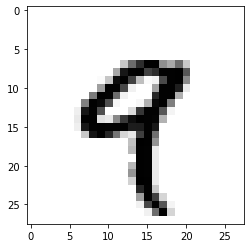

In [3]:
digit = x_train[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [20]:
x_train_np = np.array(x_train)
x_train_2d = np.reshape(x_train_np, (len(x_train_np), 28 * 28))

x_test_np = np.array(x_test)
x_test_2d = np.reshape(x_test_np, (len(x_test_np), 28 * 28))

In [8]:
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
print(y_train)
print(one_hot_train_labels)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
a = np.arange(12).reshape((3,2, 2))
print(a)
b = np.reshape(a, (3, 4))
print(b)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(64, activation='relu'))
# softmax gives a probability distribution in an 1d array for the 10 cases.
model.add(layers.Dense(10, activation='softmax'))
# categorical_crossentropy calculates the distance between two vectors. To keep it a bit visually, just think of the distance calculation of 2d vectors.
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
x_val = x_train_2d[:1000]
partial_x_train = x_train_2d[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/20
59000/59000 [==============================] - 1s 9us/step - loss: 5.8762 - accuracy: 0.7519 - val_loss: 1.6597 - val_accuracy: 0.8460
Epoch 2/20
59000/59000 [==============================] - 0s 7us/step - loss: 0.8860 - accuracy: 0.8887 - val_loss: 0.8776 - val_accuracy: 0.8970
Epoch 3/20
59000/59000 [==============================] - 0s 6us/step - loss: 0.5094 - accuracy: 0.9166 - val_loss: 0.5643 - val_accuracy: 0.9200
Epoch 4/20
59000/59000 [==============================] - 0s 6us/step - loss: 0.3465 - accuracy: 0.9331 - val_loss: 0.5345 - val_accuracy: 0.9160
Epoch 5/20
59000/59000 [==============================] - 0s 6us/step - loss: 0.2634 - accuracy: 0.9452 - val_loss: 0.4474 - val_accuracy: 0.9140
Epoch 6/20
59000/59000 [==============================] - 0s 6us/step - loss: 0.2142 - accuracy: 0.9522 - val_loss: 0.4097 - val_accuracy: 0.9320
Epoch 7/20
59000/59000 [==============================] - 0s 6us/step - los

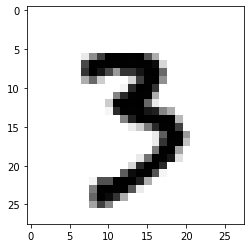

I guess it is a 3, isn't it?


In [37]:
inputIndex = 30
digit = x_test[inputIndex]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

predictions = model.predict(np.array([x_test_2d[inputIndex]]))

predictedNumber = np.argmax(predictions[0])
print('I guess it is a ' + str(predictedNumber) + ', isn\'t it?')